In [1]:
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
 
from moviepy.editor import *
%matplotlib inline
 
from sklearn.model_selection import train_test_split
 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [2]:
seed_constant = 27

np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

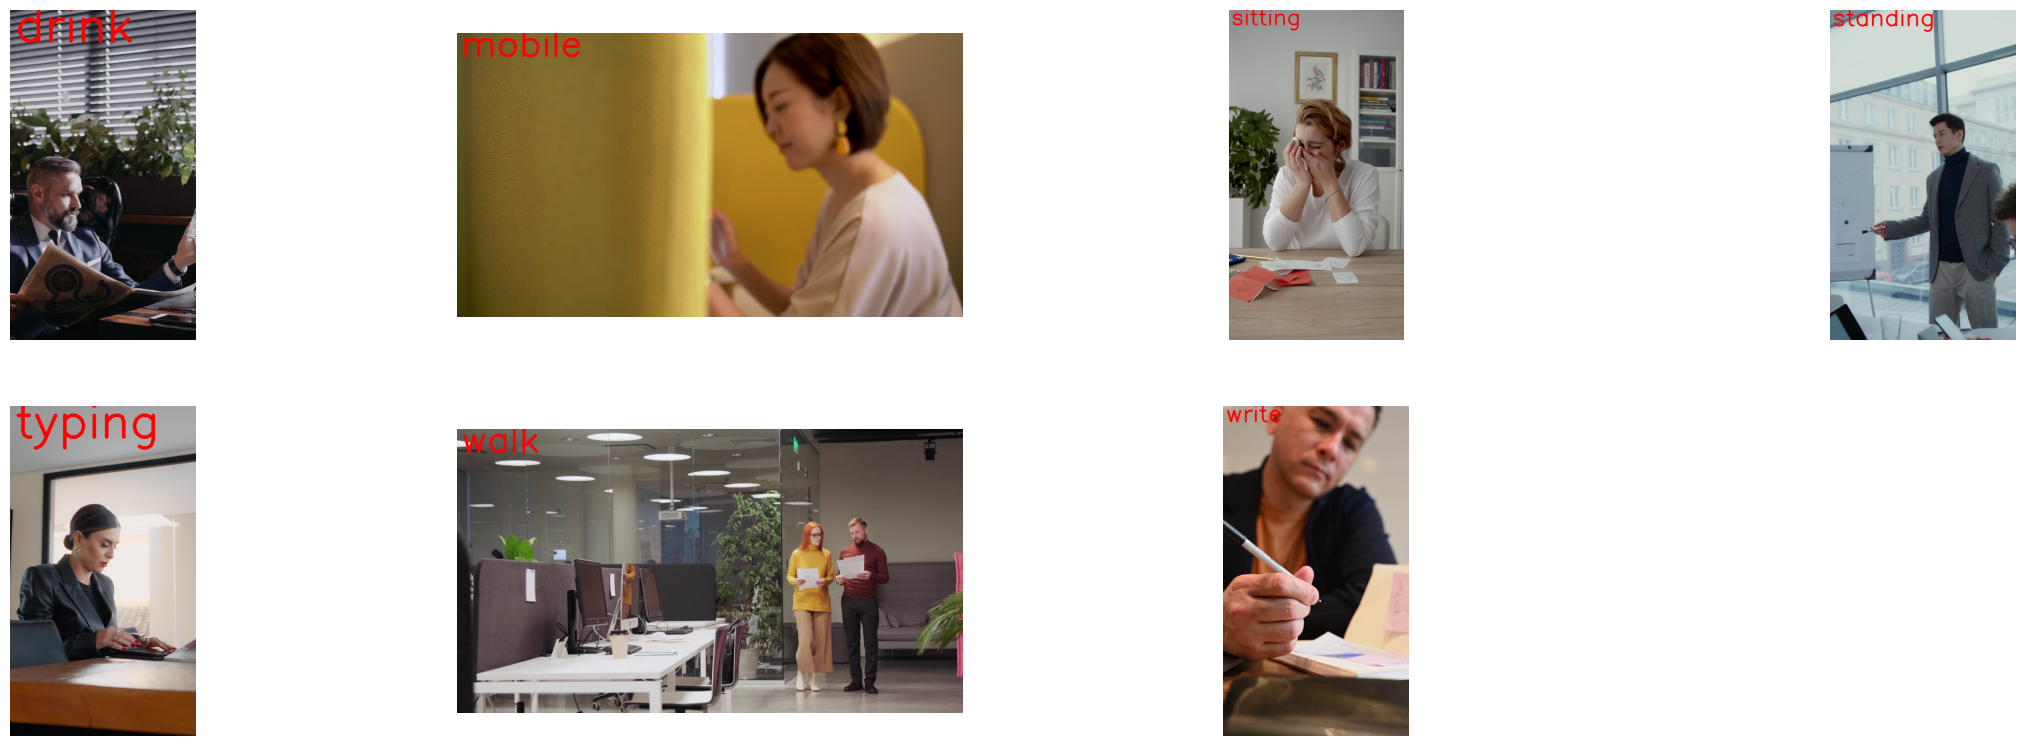

In [15]:
# Create a Matplotlib figure
plt.figure(figsize=(30, 30))  # Set the figure size - 30,30 width and height

action_path = r"D:\HARenv\HAR_Dataset"

# Get Names of all classes in UCF50
all_classes_names = os.listdir(action_path)

# Iterate through all the classes
for counter, class_name in enumerate(all_classes_names):
    # Get a list of all the video files present in a Class Directory
    video_files_names_list = os.listdir(f'D:\\HARenv\\HAR_Dataset/{class_name}')

    # Check if there are any video files in this class directory
    if len(video_files_names_list) > 0:
        # Take the first video file from the list
        selected_video_file_name = video_files_names_list[0]

        # Reading the Video File Using the Video Capture
        video_reader = cv2.VideoCapture(f'D:\\HARenv\\HAR_Dataset/{class_name}/{selected_video_file_name}')

        # Reading The First Frame of the Video File
        _, bgr_frame = video_reader.read()

        # Closing the VideoCapture object and releasing all resources.
        video_reader.release()

        # Converting the BGR Frame to RGB Frame
        rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

        # Adding The Class Name Text on top of the Video Frame.
        cv2.putText(rgb_frame, class_name, (30, 180), cv2.FONT_HERSHEY_SIMPLEX, 9, (255, 0, 0), 20) # font scale - 6, thickness - 8
        
        # Assigning the Frame to a specific position of a subplot
        plt.subplot(6, 4, counter + 1)  # Adjust the subplot grid as needed.
        plt.imshow(rgb_frame)
        plt.axis('off') # off x and y axis.

# Show the Matplotlib figure
plt.show()

In [19]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64
 
# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20
 
# Specify the directory containing the UCF50 dataset. 
DATASET_DIR = r"D:\HARenv\HAR_Dataset"

# Specify the list containing the names of the classes used for training. Feel free to choose any set of classes.
CLASSES_LIST = ["Drink", "Mobile", "sitting", "standing","typing","walking","writing"]


In [20]:
def frames_extraction(video_path):
 
    # Declare a list to store video frames.
    frames_list = []
    
    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)
 
    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
 
    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)
 
    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):
 
        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
 
        # Reading the frame from the video. 
        success, frame = video_reader.read() 
 
        # Check if Video frame is not successfully read then break the loop
        if not success:
            break
 
        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Release the VideoCapture object. 
    video_reader.release()
 
    # Return the frames list.
    return frames_list

In [21]:
def create_dataset(): 
    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(CLASSES_LIST):
        
        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')
        
        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
        # Iterate through all the files present in the files list.
        for file_name in files_list:
            
            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)
 
            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)
 
            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:
 
                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)
 
    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  
    
    # Return the frames, class index, and video file path.
    return features, labels, video_files_paths

In [ ]:
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: Drink
Extracting Data of Class: Mobile
Extracting Data of Class: sitting
Extracting Data of Class: standing
